In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv(r'C:\Users\yasas\OneDrive\Desktop\spam.csv',encoding="latin")

In [5]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
#1.data cleaning
#2.EDA
#3.Text preprocessing
#4.Model building
#5.evaluation
#6.Improvements
#7.convert to website
#8.deploy

##1.DATA CLEANING

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.shape

(5572, 5)

In [10]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [12]:
df.rename(columns={'v1' : 'target','v2':'text'},inplace=True)

In [13]:
df.sample(20)

,target,text
5433,ham,You're gonna have to be way more specific than...
1991,ham,No other Valentines huh? The proof is on your ...
2059,ham,He didn't see his shadow. We get an early spri...
2713,ham,Nope i'm not drivin... I neva develop da photo...
3510,ham,I'm serious. You are in the money base
1853,ham,I just made some payments so dont have that mu...
5201,spam,YOU VE WON! Your 4* Costa Del Sol Holiday or å...
254,ham,"I'm back, lemme know when you're ready"
3803,ham,"No dude, its not fake..my frnds got money, tht..."
60,ham,Your gonna have to pick up a $1 burger for you...


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [15]:
df['target']=encoder.fit_transform(df['target'])

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
df.duplicated().sum()

403

In [19]:
df=df.drop_duplicates()

In [20]:
df.duplicated().sum()

0

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df.shape

(5169, 2)

## EDA

In [23]:
# exploratory data analysis

In [24]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

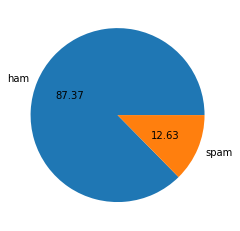

In [25]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yasas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [29]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [32]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [33]:
df.head(5)

,target,text,num_words
0,0,"Go until jurong point, crazy.. Available only ...",24
1,0,Ok lar... Joking wif u oni...,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,0,U dun say so early hor... U c already then say...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",15


In [34]:
df['num_characters']=df['text'].apply(len)

In [35]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [36]:
df.head()

,target,text,num_words,num_characters,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2
1,0,Ok lar... Joking wif u oni...,8,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2
3,0,U dun say so early hor... U c already then say...,13,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1


In [37]:
df[['num_words','num_characters','num_sentence']].describe()

,num_words,num_characters,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,18.453279,78.977945,1.947185
std,13.324793,58.236293,1.362406
min,1.000000,2.000000,1.000000
25%,9.000000,36.000000,1.000000
50%,15.000000,60.000000,1.000000
75%,26.000000,117.000000,2.000000
max,220.000000,910.000000,28.000000


In [38]:
df[df['target']==0][['num_words','num_characters','num_sentence']].describe()

,num_words,num_characters,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,17.120903,70.459256,1.799601
std,13.493725,56.358207,1.278465
min,1.000000,2.000000,1.000000
25%,8.000000,34.000000,1.000000
50%,13.000000,52.000000,1.000000
75%,22.000000,90.000000,2.000000
max,220.000000,910.000000,28.000000


In [39]:
df[df['target']==1][['num_words','num_characters','num_sentence']].describe()

,num_words,num_characters,num_sentence
count,653.000000,653.000000,653.000000
mean,27.667688,137.891271,2.967841
std,7.008418,30.137753,1.483201
min,2.000000,13.000000,1.000000
25%,25.000000,132.000000,2.000000
50%,29.000000,149.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,224.000000,8.000000


In [40]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

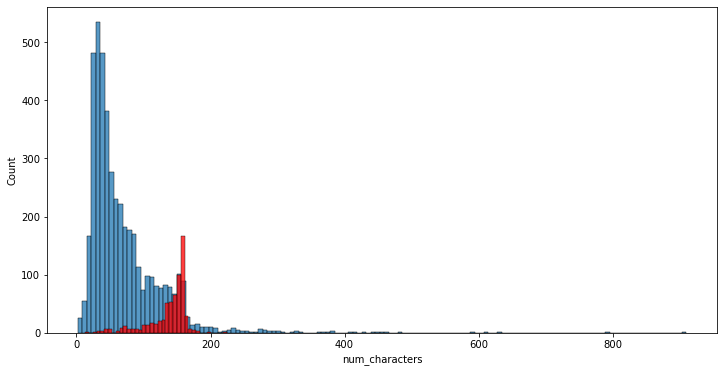

In [43]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

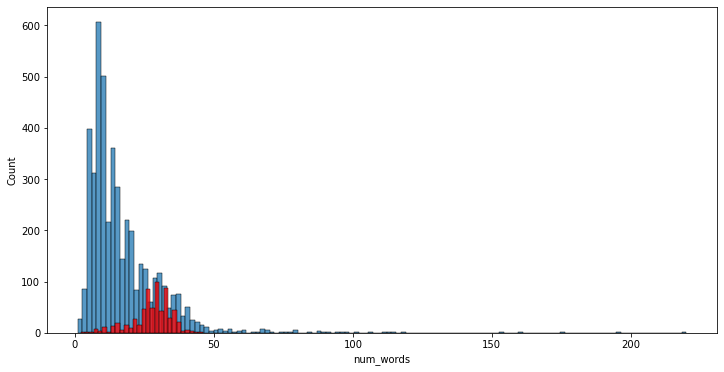

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentence', ylabel='Count'>

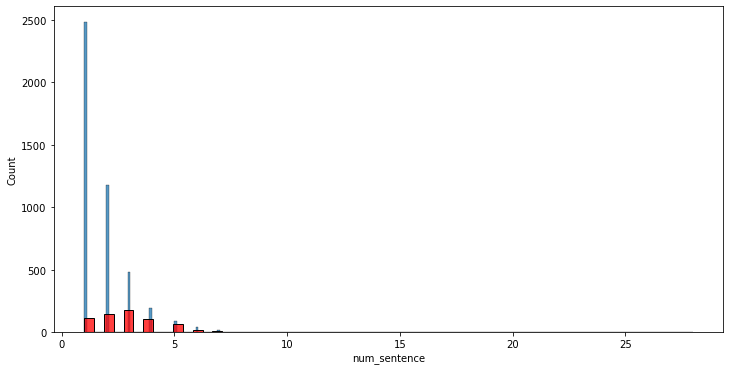

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentence'])
sns.histplot(df[df['target']==1]['num_sentence'],color='red')

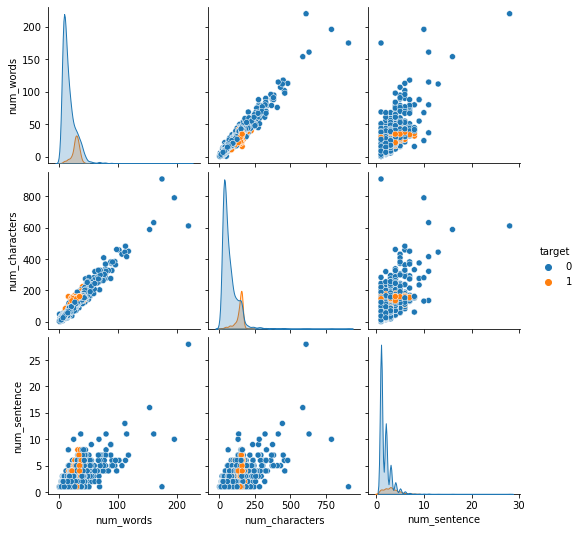

In [46]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

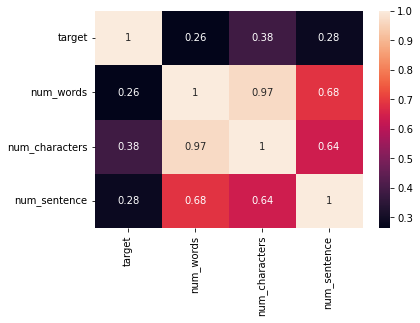

In [47]:
sns.heatmap(df.corr(),annot=True)

3. Data Preprocessing
Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming

In [60]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [54]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yasas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [56]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [57]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [61]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cry")

'gon na home soon want talk stuff anymor tonight k cri'

In [62]:
df['transformed_text'] = df['text'].apply(transform_text)

In [63]:
df.head(5)

,target,text,num_words,num_characters,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1,nah think goe usf live around though


In [67]:
import sys
print(sys.executable)

C:\Users\yasas\New folder\python.exe


In [70]:
pip install wordcloud


     -------------------------------------- 153.1/153.1 kB 2.3 MB/s eta 0:00:00


In [71]:
from wordcloud import WordCloud

In [72]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [73]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

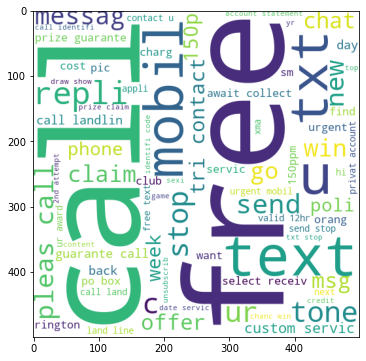

In [74]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [76]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

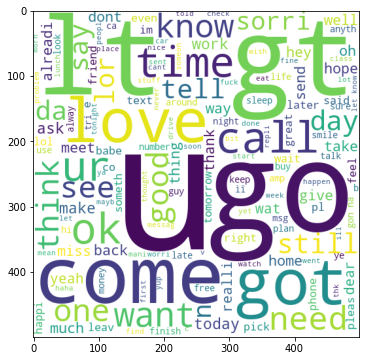

In [77]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [78]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [79]:
len(spam_corpus)

9939

C:\Users\yasas\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


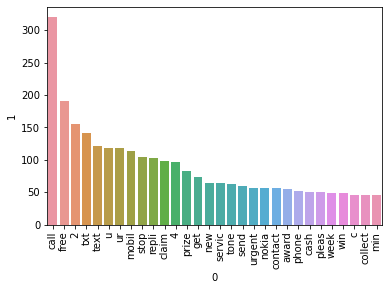

In [80]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [81]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [82]:
len(ham_corpus)

35394

C:\Users\yasas\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


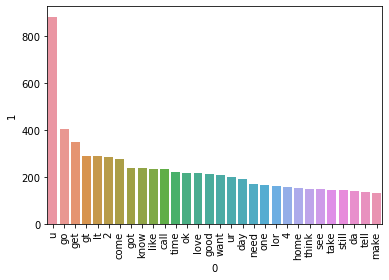

In [83]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [84]:
df.head()

,target,text,num_words,num_characters,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1,nah think goe usf live around though


# MODEL BUILDING

In [85]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [86]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [87]:
X.shape

(5169, 3000)

In [88]:
y = df['target'].values

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [91]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [92]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [93]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [94]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [95]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [98]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [99]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [100]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [101]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [102]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92


In [104]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [105]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.929400,0.828283
4,LR,0.958414,0.970297
5,RF,0.974855,0.982759
6,AdaBoost,0.960348,0.929204
7,BgC,0.957447,0.867188
8,ETC,0.974855,0.974576
9,GBDT,0.947776,0.920000


In [106]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [107]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,KN,Accuracy,0.905222
2,NB,Accuracy,0.970986
3,DT,Accuracy,0.929400
4,LR,Accuracy,0.958414
5,RF,Accuracy,0.974855
6,AdaBoost,Accuracy,0.960348
7,BgC,Accuracy,0.957447
8,ETC,Accuracy,0.974855
9,GBDT,Accuracy,0.947776


In [108]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))